进行绘图所需的模块引入

In [7]:
%matplotlib ipympl

In [29]:
import numpy as np
import seaborn as sns
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import os

下面从项目中的Data文件夹读取相应的数据

In [9]:
location_path='D:\coding\AcousticSensing\Data\Cube\sensor_location.txt'
waveform_path=r'D:\coding\AcousticSensing\Data\Cube\cube_waveform'

# waveform=scipy.io.loadmat(waveform_path)
# print(waveform.keys())
# dict_keys(['__header__', '__version__', '__globals__', 'active','dt','wfm_active'])

# waveform=scipy.io.loadmat(waveform_path)['dt']
# print(waveform)
# 200

waveform=scipy.io.loadmat(waveform_path)['wfm_active']
waveform=waveform.swapaxes(0,2)
[source,receiver,frame]=waveform.shape
print('waveform.shape')
print(waveform.shape)
# we confirm that the shape of waveform is 24*24*2048,the first dimension means the source,the second dimension means the receiver,the third dimension means the frame


# then we will load the location of the sensor
Location_pre=pd.read_table(location_path, sep=' ').values
Location=[]
for i in range(24):
    Location.append([Location_pre[i][1],Location_pre[i][2],Location_pre[i][3]])
    
Location=np.array(Location)
print('Location')
print(Location)

waveform.shape
(24, 24, 2048)
Location
[[49.784   2.667  61.2648]
 [49.9872  2.413  31.5722]
 [24.6634  2.6924 60.8838]
 [24.9682  2.5146 30.9626]
 [ 2.4638 24.8666 60.4774]
 [ 2.4892 25.4762 30.1752]
 [ 2.7178 49.8856 60.6806]
 [ 2.5146 50.5714 30.2768]
 [24.8666 73.66   60.6806]
 [25.273  73.8124 30.1752]
 [50.673  73.6346 60.579 ]
 [50.5714 73.8378 30.1752]
 [73.6346 50.673  60.579 ]
 [73.66   50.673  30.2768]
 [73.66   25.4762 61.087 ]
 [73.6092 25.0698 30.2768]
 [25.5778 50.673   2.3876]
 [25.5778 25.1714  2.4892]
 [50.673  50.0634  2.6416]
 [50.7746 24.9682  2.3114]
 [25.4762 25.6286 88.9   ]
 [50.9778 50.673  88.6968]
 [50.8762 25.3746 89.1032]
 [25.5778 50.9778 89.0016]]


下面我们将进行一些简单的作图，首先是将active的waveform数据进行画出

In [31]:
# 这里我们创建source个folder，用于存储每个source传播时reciever的数据图像
path=r'D:\coding\AcousticSensing\Draw\cube\waveform_pic'
for i in range(source):
    os.mkdir(path+'\\'+str(i+1))

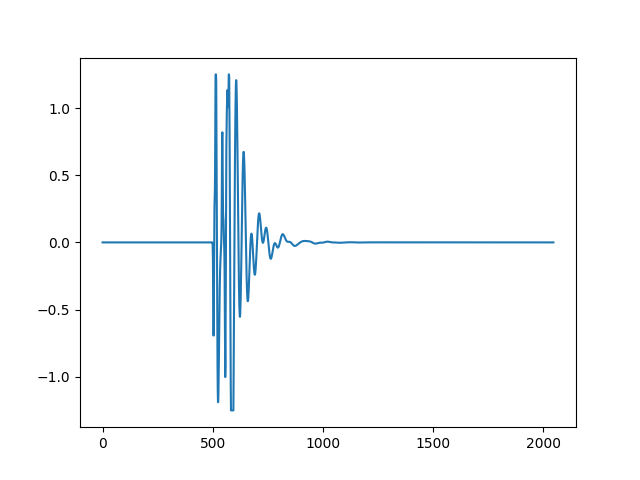

In [ ]:
waveform_reserve_path='D:\coding\AcousticSensing\Draw\cube\waveform_pic'
# for i in range(source):
#     for j in range(receiver):
#         plt.figure(figsize=(20,8))
#         plt.plot(range(frame),waveform[i][j])
#         plt.savefig(waveform_reserve_path+'\\'+str(i+1)+'\\'+str(i+1)+'-'+str(j+1)+'.png')
#         plt.close()
    
plt.close()
# under used to show
plt.figure()
plt.plot(range(frame),waveform[0][0])



plt.show()